# Lesson - Statistics and Probability I: Sampling 

This is first of the series of lesson on statistics. 
We'll go deep into the theory of statistics and will also focus on powerful statistical techniques and metrics like `standard deviation`, `z-scores`, `confidence intervals`, `probability estimation`, and `hypothesis testing` (including `A/B testing`).

In this lesson, we begin with discussing the details around getting data for analysis, and continue with trying to understand the intricacies around how data is structured and measured.

Here is the workflow from data acquisition to data analysis.

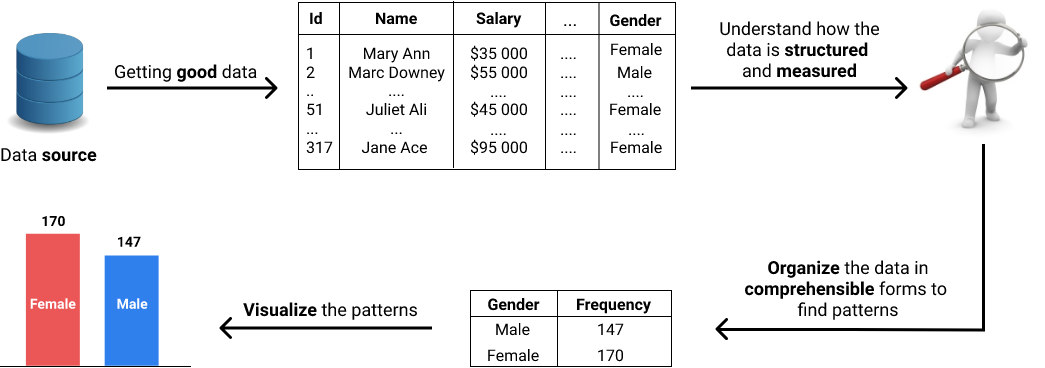

### Solving Problems with Statistics

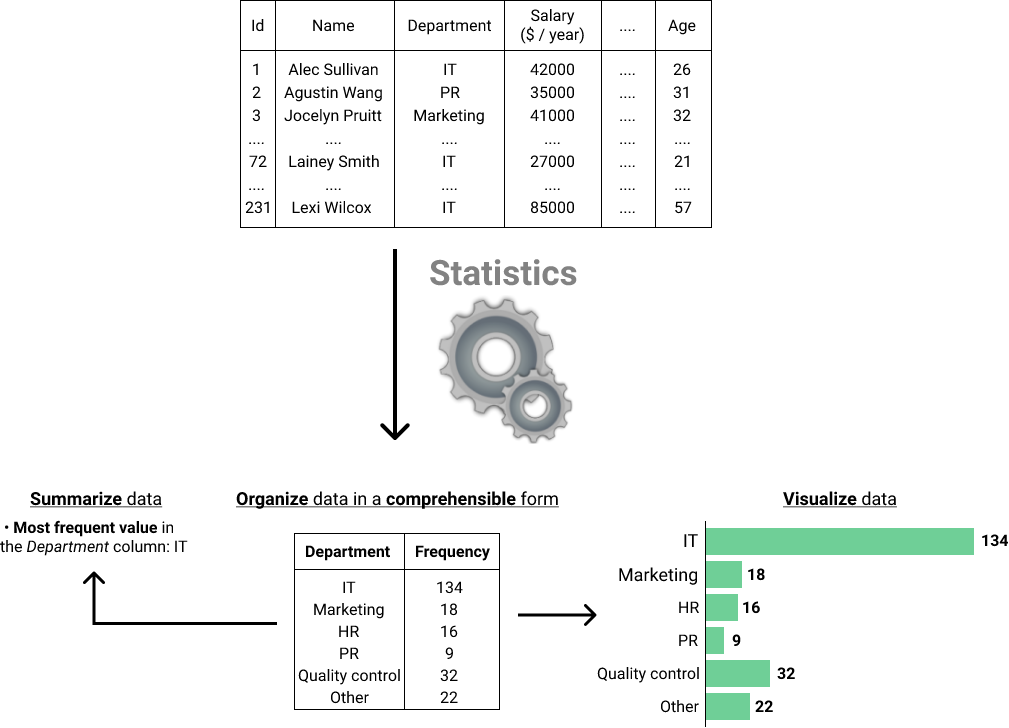

### Populations and Samples

In statistics, the set of all individuals relevant to a particular statistical question is called a **population**. A smaller group selected from a population is called a sample. When we select a smaller group from a population we do sampling. 

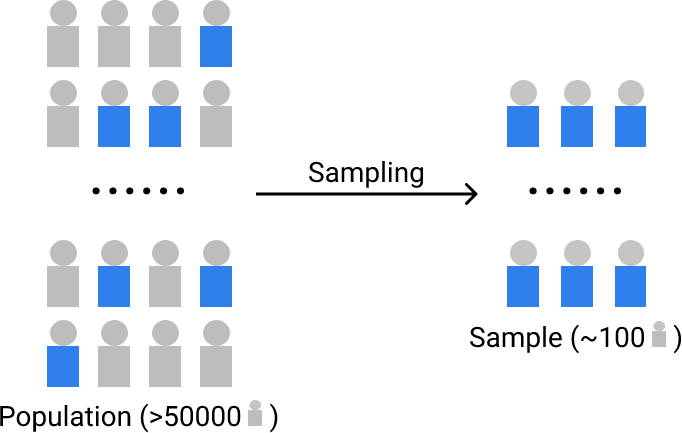

Whether a set of data is a sample or a population depends on the context and the question we're trying to answer. Populations do not necessarily consist of people. 




The individual elements of a population or a sample go under many names. We often see the elements of a population referred to as individuals, units, events, observations. These are all used interchangeably and refer to the same thing: the individual parts of a population.

In the case of a sample, we often see this terminology used interchangeably: sample unit, sample point, sample individual, or sample observation.

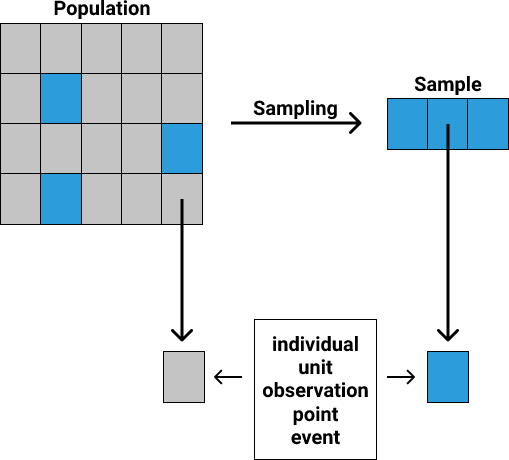

### Sampling Error

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

These problems can be solved by sampling from the population that interests us.

When we sample, we should focus on getting the data more or less similar to the data in the population. But since, a sample is by definition an incomplete set of data for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. This difference can be seen as an error, and because it's the result of sampling, it's called **sampling error**.

A metric specific to a population is called a **parameter**, while one specific to a sample is called a **statistic**.
`sampling error = parameter - statistic`



**Dataset**

In this lesson, we will be working with a dataset `wnba.csv` for which we will be measuring the sampling error. 

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set can be downloaded from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017), where we can also find useful documentation for the data set.


In [1]:
import pandas as pd

wnba = pd.read_csv("wnba.csv")

In [2]:
print(wnba.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [3]:
print(wnba.head())

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0  

In [4]:
print(wnba.tail())

                 Name Team  Pos  Height  Weight        BMI Birth_Place  \
138     Tiffany Hayes  ATL    G     178    70.0  22.093170          US   
139   Tiffany Jackson   LA    F     191    84.0  23.025685          US   
140  Tiffany Mitchell  IND    G     175    69.0  22.530612          US   
141      Tina Charles   NY  F/C     193    84.0  22.550941          US   
142     Yvonne Turner  PHO    G     175    59.0  19.265306          US   

              Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  \
138  September 20, 1989   27     Connecticut  ...   28    89  117   69   37   
139      April 26, 1985   32           Texas  ...    5    18   23    3    1   
140  September 23, 1984   32  South Carolina  ...   16    70   86   39   31   
141        May 12, 1988   29     Connecticut  ...   56   212  268   75   21   
142    October 13, 1987   29        Nebraska  ...   11    13   24   30   18   

     BLK  TO  PTS  DD2  TD3  
138    8  50  467    0    0  
139    3   8   28   

**Exercise**
Use the `Games Played` column to find the maximum number of games played by a player in the season 2016-2017.
- assign the result to a variable named `parameter`
Using the `Series.sample()` or `DataFrame.sample` method, sample randomly 30 players from the population, and assign the result to a variable named `sample`
- Find the maximum number of games using the sample, and assign the result to a variable named `statistic`
Measure the sampling error, and assign the result to a variable named `sampling_error`
- 

In [5]:
# We will slice wnba dataframe to create a sample_wnba dataframe for analysis based on games played

sample = wnba.sample(n=30, random_state=1)[["Name", "Games Played"]] #random_state=1 ensures reproducibility


In [6]:
parameter = wnba["Games Played"].max()
statistic = sample["Games Played"].max()
sampling_error = parameter -  statistic

print('parameter:', parameter, '\n')
print('statistic:', statistic, '\n')
print('sampling_error:', sampling_error)

parameter: 32 

statistic: 30 

sampling_error: 2


### Simple Random Sampling

Above method performs simple random sampling (RSS) by generating an array of random numbers. Using the `random_state` parameter, `DataFrame.sample(n= 30, random_state = 1)`, makes the generation of random numbers predictable. This is because the method uses a pseudorandom number generator under the hood, and  uses uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With `random_state` we specify that initial value used by the pseudorandom number generator. If we begin from an initial value of `N` to generate `n` random numbers, we'll get the same `n`numbers no matter how many times we run the code.



**Exercise**
Using simple random sampling, take 100 samples of 10 values each from WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a `for` loop:

- Sample 10 values from the `PTS` column
- Compute the mean of this sample made of 10 values from the `PTS `column, and append the result to a list

- Vary the random_state parameter of the `sample()` method with values between 0 and 99. For the first iteration of the `for` loop, `random_state` should equal 0.

Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained above:

- Using `plt.scatter()`, display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.

- Using plt.axhline(), draw a horizontal line that represents the average number of points in the population.

population_mean: 201.7902097902098 

sample_means: [145.1, 185.4, 140.4, 293.7, 172.7, 124.9, 187.8, 157.0, 188.9, 282.0, 241.5, 178.1, 157.0, 301.4, 212.9, 115.0, 135.3, 197.2, 182.5, 236.8, 145.9, 255.9, 161.2, 184.1, 213.6] 



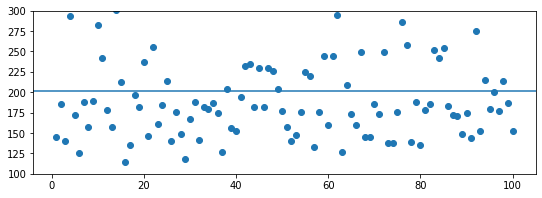

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(0,100):
    s_mean = wnba["PTS"].sample(n=10, random_state=i).mean()
    sample_means.append(s_mean)

print("population_mean:", population_mean,'\n' )
print("sample_means:", sample_means[:25], '\n')

plt.figure(figsize=(9, 3))
plt.scatter(x=range(1,101), y=sample_means)    

plt.ylim(100,300)
plt.axhline(population_mean)
plt.show()

### Importance of Sample Size

Above, we can see that the sample error is very large in several cases.

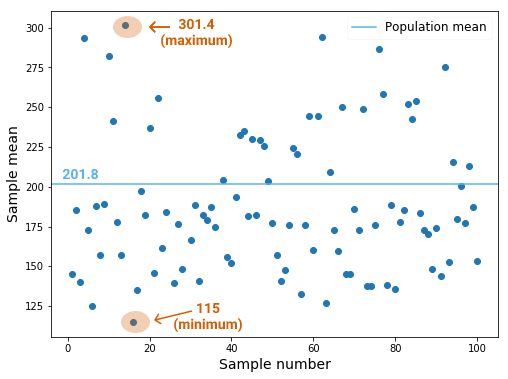

Because sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population:

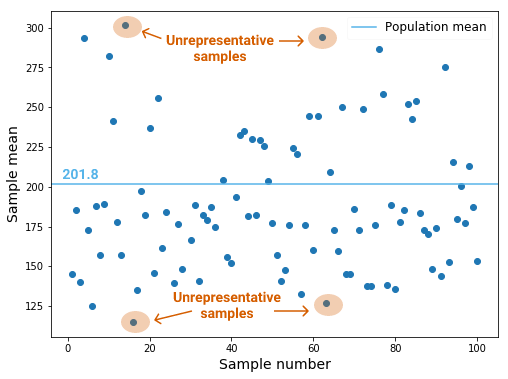

This problem can be solved by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

population_mean: 201.7902097902098 



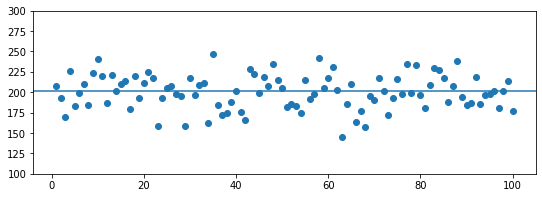

In [8]:
# for n=20
import matplotlib.pyplot as plt
%matplotlib inline

sample_means = []
population_mean = wnba['PTS'].mean()


for i in range(0,100): 
    s_mean = wnba["PTS"].sample(n=40, random_state=i).mean()
    sample_means.append(s_mean)

print("population_mean:", population_mean,'\n' )
plt.figure(figsize=(9, 3))
plt.scatter(x=range(1,101), y=sample_means) 
plt.ylim(100,300)
plt.axhline(population_mean)
plt.show()

population_mean: 201.7902097902098 



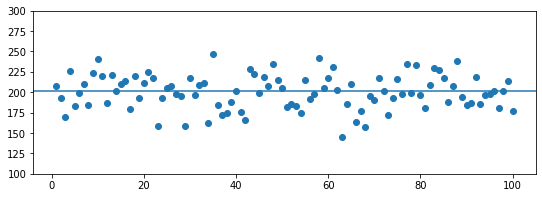

In [9]:
# for n=40
import matplotlib.pyplot as plt
%matplotlib inline

sample_means = []
population_mean = wnba['PTS'].mean()


for i in range(0,100): 
    s_mean = wnba["PTS"].sample(n=40, random_state=i).mean()
    sample_means.append(s_mean)

print("population_mean:", population_mean,'\n' )
plt.figure(figsize=(9, 3))
plt.scatter(x=range(1,101), y=sample_means)
plt.ylim(100,300)
plt.axhline(population_mean)
plt.show()

 We can see above, how sample means tend to vary less and less around the population mean as we increase the sample size. 
 - Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
 
 - When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.
 
 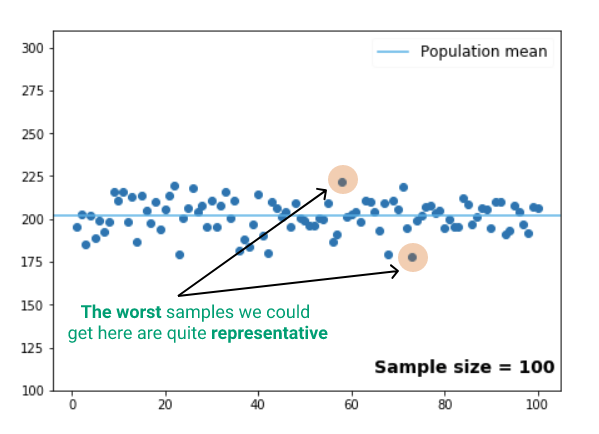

### Stratified Sampling

Because simple random sampling is entirely random, it can leave out certain population individuals that are of great interest to some of the questions we may have.
For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that some categories won't be included in our sample.

```
print(wnba['Pos'].unique())

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)
```
G: Guard
F: Forward
G/F: Guard/Forward
C: Centre
F/C: Forward/Center

The downside of simple random sampling is that it can leave out individuals playing in a certain position on the field. 

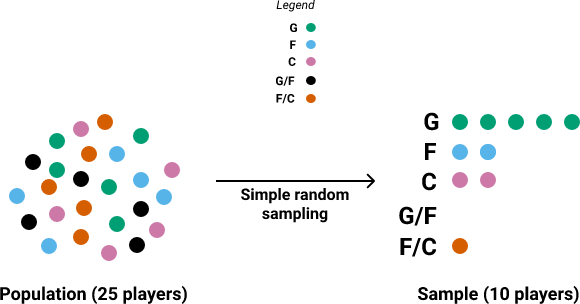


To ensure we end up with a sample that has observations for all the categories of interest, we can group our data set by player position, and then sample randomly from each group. 

This sampling method is called **stratified** sampling, and each stratified group is also known as a **stratum**.
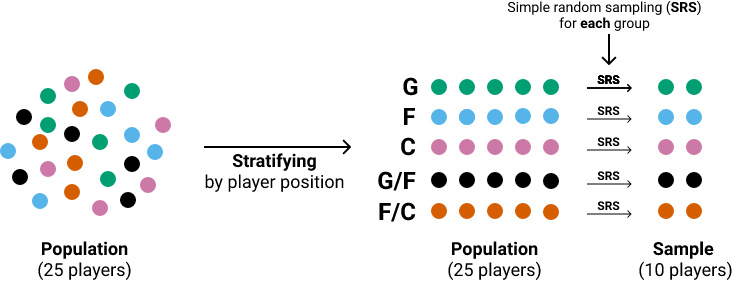

**Exercise**

Perform stratified sampling: stratify the data set by player position, and then do simple random sampling on every stratum. At the end, use the sample to find which position has the greatest number of points per game.

- Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the `PTS` column, and the number of games played in the `Games Played` column. Give the new column a relevant name.

- Stratify the wnba data set by player position. The `Pos` column describes a player's position on the field. Assign each stratum to a different variable.

- Loop through the `strata`, and for each stratum:
 - Sample 10 observations using simple random sampling (set `random_state` = 0).
 - Find the mean points per game using the sample. Use the new column created earlier.
 - Find a way to store the mean along with its corresponding position. You can use a dictionary.

- Find the position that has the greatest number of points per game, and assign its name to a variable named `position_most_points`.

To find the dictionary key that has the greatest dictionary value, we can use:
```
max(stats, key=lambda key: stats[key])

```


- 

In [10]:
wnba['pts_per_game'] = wnba['PTS']/wnba['Games Played']

strata = wnba.groupby('Pos')
strata_means={}

pos = wnba["Pos"].unique()

for p in pos:
    s_mean = pd.Series(strata.get_group(p)["pts_per_game"]).sample(n=10, random_state=0).mean()
    
    strata_means[p] = s_mean
    
print(strata_means)    
position_most_points = max(strata_means, key = lambda key: strata_means[key] )

print(position_most_points)
        


{'F': 8.702175158545568, 'G/F': 6.817264935760487, 'G': 7.092926195632343, 'C': 9.833761394334251, 'F/C': 9.059118773946361}
C


### Proportional Stratified Sampling

The problem with SRS in `wnba["PTS"]`, even if stratified is that the number of total points is influenced by the number of games played, which ranges from 2 to 32. Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games.

In [11]:
v_counts = wnba["Games Played"].value_counts(bins=3, normalize = True)
print(v_counts)


(22.0, 32.0]     0.727273
(12.0, 22.0]     0.181818
(1.969, 12.0]    0.090909
Name: Games Played, dtype: float64


Above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval is not included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

The scenario of under or over estimation is common for small samples.

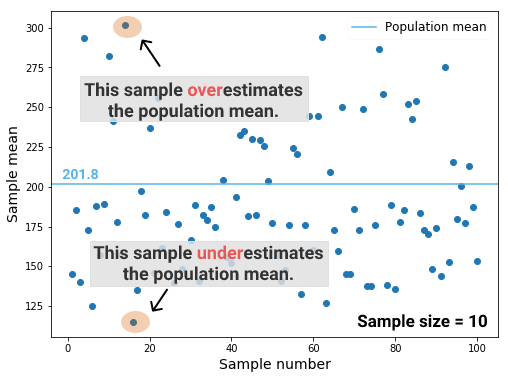

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

This is known as proportional stratified sampling i.e. picking up sample size in proportion to strata size.

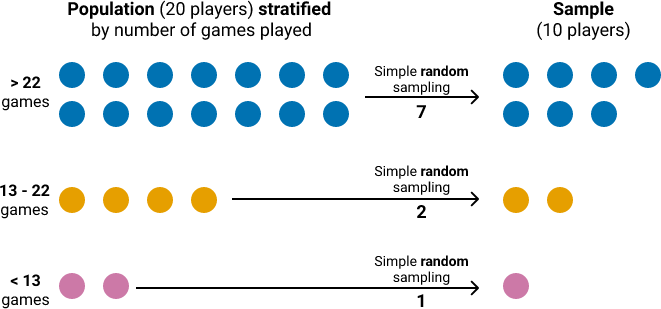

**Exercise**

Perform stratified sampling on the data set 100 times, and sample strata proportionally.

- Stratify the data set by the **number of games** played in the following way: the first strata should be composed of players that played `12 games or less`; the second of players that played `more than 12 games, but up to 22 (included)`; and the third of players that played `more than 22 games (22 not included)`.

- Perform stratified sampling 100 times. For each of the 100 iterations of a `for` loop:
 - Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum (eventually, we'll concatenate these sample observations and calculate the mean of the PTS column).
 
 - random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.
 
 - Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use `pd.concat()`
 
 - Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.
 
Display the entire sampling process.
- Using `plt.scatter()`, display the sampling means on a scatter plot. Place the means on the y-axis, and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
- Using `plt.axhline()`, display the population mean for the total points in the form of a horizontal line. 

201.7902097902098 200.21500000000003


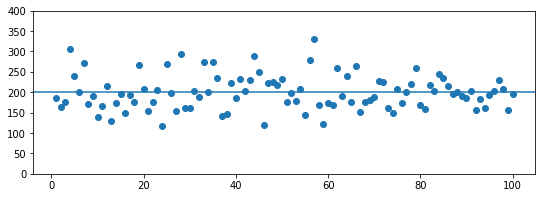

In [12]:

strat_12 = wnba[wnba["Games Played"] <=12]
strat_22 = wnba[(wnba["Games Played"] >12) & (wnba["Games Played"] <=22)]
strat_32 = wnba[wnba["Games Played"] >22]

pop_mean = wnba["PTS"].mean()
prop_means = []

for i in range(0,100):
    s_12 = strat_12["PTS"].sample(n=1, random_state=i)
    s_22 = strat_22["PTS"].sample(n=2, random_state=i)
    s_32 = strat_32["PTS"].sample(n=7, random_state=i)
    
    final_sample = pd.concat([s_12, s_22, s_32])
    final_sample_mean = final_sample.mean()
    prop_means.append(final_sample_mean)

print(pop_mean, pd.Series(prop_means).mean())
    
plt.figure(figsize=(9, 3))
plt.scatter(x=range(1,101), y=prop_means)    

plt.ylim(0,400)
plt.axhline(pop_mean)
plt.show()    


### Choosing the Right Strata

Even in the above method, many samples are unrepresentative. 

The poor performance is caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game. It makes more sense to stratify the data by number of minutes played. 

The data set contains the total amount of minutes a player had for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):

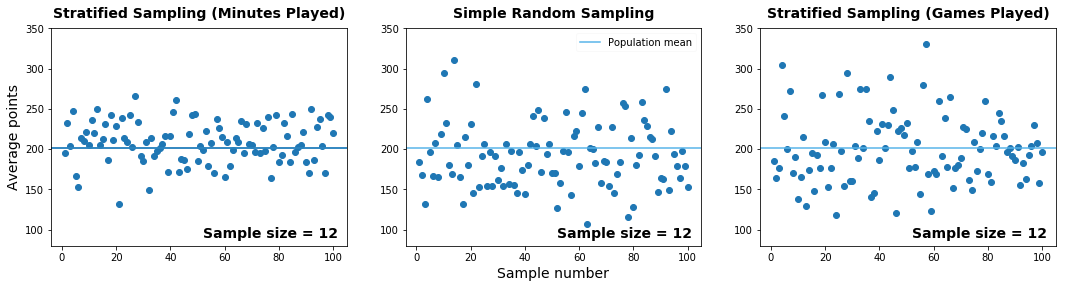

**Guidelines for Choosing appropriats strata**

- Minimize the variability within each stratum.

- Maximize the variability between strata.

- The stratification criterion should be strongly correlated with the property being measured.

- 

### Cluster Sampling

Cluster sampling means picking up clusters of data for sampling instead of the entire population, and it is different from stratification. Strata are groups of population which have internal similarity between units in at least one property (criteria for stratification), clusters need not have that similarity. 

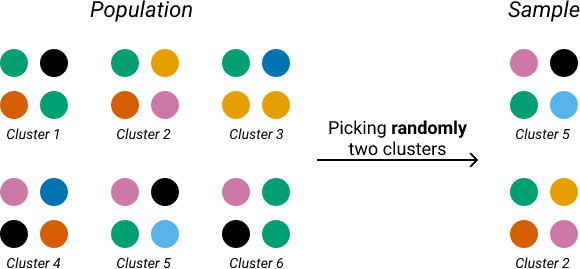


We need to find a way to pick randomly a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

**Exercise**

Simulate a cluster sampling on `wnba`data set.

- Pick four team clusters randomly (use random_state = 0).
- Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
- Use the data collected to estimate the mean for the following player attributes:
 - Height;
 - Age;
 - BMI;
 - Total points.
Finally, measure the sampling error of estimates, and assign the errors to the following variables: `sampling_error_height`, `sampling_error_age`, `sampling_error_BMI`, `sampling_error_points`.

In [14]:
clusters = pd.Series(wnba["Team"].unique()).sample(n=4, random_state=0)
print(clusters)

wnba_cluster = pd.DataFrame()

for c in clusters:
    s_cluster = wnba[wnba["Team"] == c]
    wnba_cluster = wnba_cluster.append(s_cluster)                    

cluster_height = wnba_cluster["Height"].mean()
cluster_age = wnba_cluster["Age"].mean()
cluster_bmi = wnba_cluster["BMI"].mean()
cluster_PTS = wnba_cluster["PTS"].mean()


pop_height = wnba["Height"].mean()
pop_age = wnba["Age"].mean()
pop_bmi = wnba["BMI"].mean()
pop_PTS = wnba["PTS"].mean()

sampling_error_height = pop_height - cluster_height
sampling_error_age = pop_age - cluster_age
sampling_error_BMI = pop_bmi - cluster_bmi
sampling_error_points = pop_PTS - cluster_PTS

print(sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


### Sampling in Data Science Practice

There are more situations, where a data scientist can use sampling.

 - For example an e-commerce company that has a table in a database with more than 10 million rows of online transactions.
 
 - Or an API that either has a usage limit, or is not free. In this case, we are more or less forced to sample. Knowing how and what to sample can be of great use.
 
 - Another common use case of sampling is when the data is scattered across different locations (different websites, different databases, different companies, etc.)

### Descriptive and Inferential Statistics

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population, or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do **descriptive statistics**.

When we try to use a sample to draw conclusions about a population, we do **inferential statistics** (we infer information from the sample about the population).

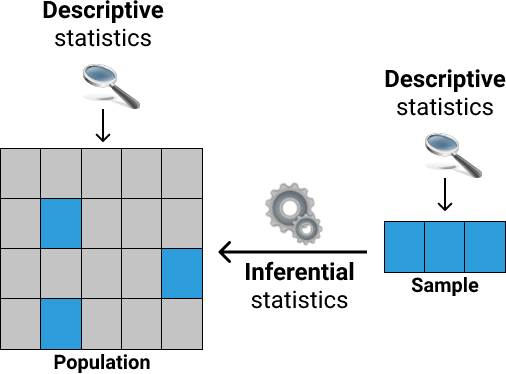

### Statistics Workflow

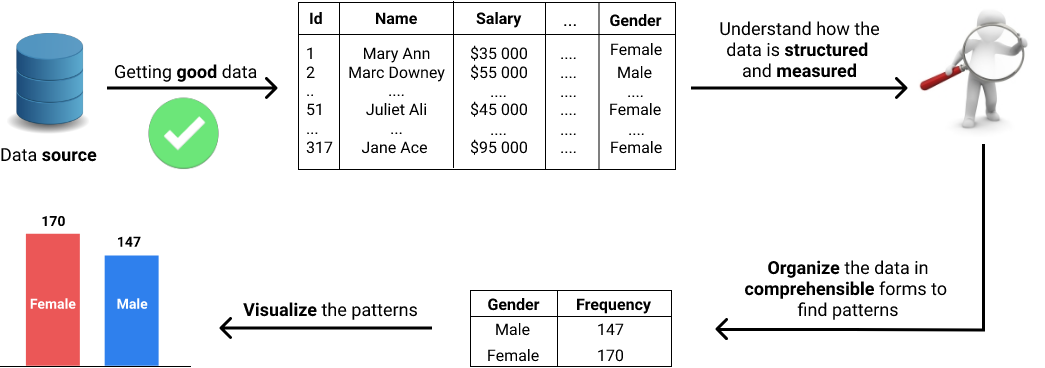